In [18]:
%pylab inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


In [19]:
from os import listdir
from os.path import join

In [20]:
dataframes = []

for filepath in [join('BensonData', f) for f in listdir('BensonData')]:
    new_df = pd.read_csv(filepath, index_col=0)
    dataframes.append(new_df)

df1 = pd.concat(dataframes)
df1.reset_index(inplace=True)

In [21]:
df1.head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,WEEKDAY,ENTRY_DIFFS,EXIT_DIFFS,TOTAL_TRAFFIC,DDATE,DWEEKDAY
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,00:00:00,REGULAR,6566463,2224050,2018-03-31 00:00:00,5,NaN,NaN,NaN,2018-03-30,4
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,REGULAR,6566470,2224053,2018-03-31 04:00:00,5,7.0,3.0,10.0,2018-03-31,5
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,08:00:00,REGULAR,6566470,2224053,2018-03-31 08:00:00,5,0.0,0.0,0.0,2018-03-31,5
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,12:00:00,REGULAR,6566470,2224055,2018-03-31 12:00:00,5,0.0,2.0,2.0,2018-03-31,5
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,16:00:00,REGULAR,6566470,2224055,2018-03-31 16:00:00,5,0.0,0.0,0.0,2018-03-31,5


In [22]:
df2 = (df1.sort_values(by=['STATION', 'C/A', 'SCP', 'LINENAME', 'UNIT'])
          .groupby(['STATION', 'LINENAME'])['TOTAL_TRAFFIC']
          .sum())

In [23]:
df3 = df2.sort_values(ascending=False)[:10]
df3.head(10)

STATION          LINENAME    
GRD CNTRL-42 ST  4567S           27852140.0
34 ST-HERALD SQ  BDFMNQRW        21893193.0
34 ST-PENN STA   ACE             15704563.0
14 ST-UNION SQ   LNQR456W        14406701.0
42 ST-PORT AUTH  ACENQRS1237W    14078973.0
TIMES SQ-42 ST   1237ACENQRSW    12801085.0
FULTON ST        2345ACJZ        12064174.0
47-50 STS ROCK   BDFM            11039468.0
59 ST COLUMBUS   ABCD1           11034421.0
FLUSHING-MAIN    7               10757264.0
Name: TOTAL_TRAFFIC, dtype: float64

In [24]:
ticks_y = df3.index.tolist()
ticks_y

[('GRD CNTRL-42 ST', '4567S'),
 ('34 ST-HERALD SQ', 'BDFMNQRW'),
 ('34 ST-PENN STA', 'ACE'),
 ('14 ST-UNION SQ', 'LNQR456W'),
 ('42 ST-PORT AUTH', 'ACENQRS1237W'),
 ('TIMES SQ-42 ST', '1237ACENQRSW'),
 ('FULTON ST', '2345ACJZ'),
 ('47-50 STS ROCK', 'BDFM'),
 ('59 ST COLUMBUS', 'ABCD1'),
 ('FLUSHING-MAIN', '7')]

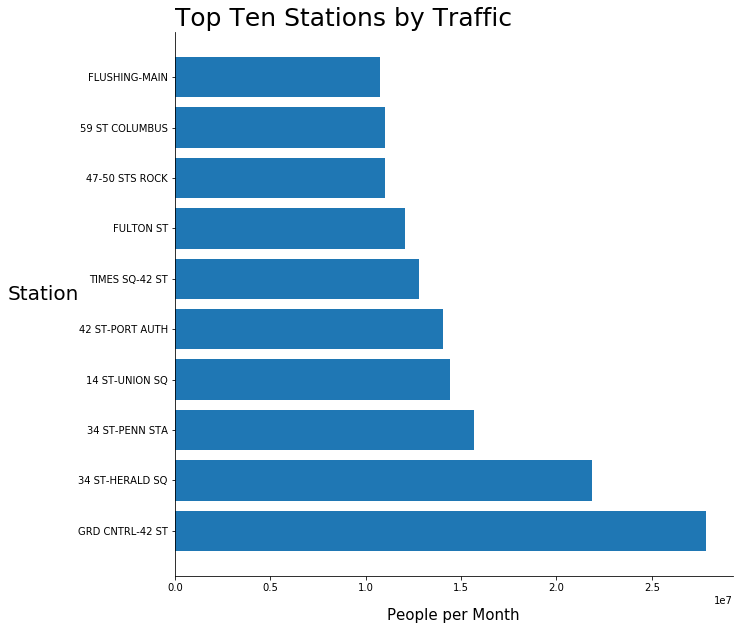

In [25]:
plt.figure(figsize= [10,10])
plt.barh(np.arange(10), df3.values)
plt.yticks(np.arange(10), [x for x,y in ticks_y])
plt.title("Top Ten Stations by Traffic", size = 25, loc = 'left')
plt.xlabel('People per Month', size = 15, labelpad = 15)
plt.ylabel('Station', size = 20, rotation = 0, labelpad = 35)
sns.despine()

In [26]:
location=pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')

In [37]:
tind=df1[df1.STATION=='TIMES SQ-42 ST'].index
df1.loc[tind,'Station_ID']=11

tind=df1[df1.STATION=='GRD CNTRL-42 ST'].index
df1.loc[tind,'Station_ID']=402

tind=df1[df1.STATION=='34 ST-HERALD SQ'].index
df1.loc[tind,'Station_ID']=12

tind=df1[df1.STATION=='34 ST-PENN STA'].index
df1.loc[tind,'Station_ID']=164

tind=df1[df1.STATION=='FULTON ST'].index
df1.loc[tind,'Station_ID']=106

tind=df1[df1.STATION=='42 ST-PORT AUTH'].index
df1.loc[tind,'Station_ID']=163

tind=df1[(df1.STATION=='28 ST')& (df1.LINENAME=='6')].index
df1.loc[tind,'Station_ID']=404

tind=df1[(df1.STATION=='33 ST') & (df1.LINENAME=='6')].index
df1.loc[tind,'Station_ID']=403

tind=df1[df1.STATION=='14 ST-UNION SQ'].index
df1.loc[tind,'Station_ID']=15

tind=df1[(df1.STATION=='WALL ST')&(df1.LINENAME=='23')].index
df1.loc[tind,'Station_ID']=333

tind=df1[df1.STATION=='HOUSTON ST'].index
df1.loc[tind,'Station_ID']=324

tind=df1[df1.STATION=='FLUSHING-MAIN'].index
df1.loc[tind,'Station_ID']=447

tind=df1[df1.STATION=='59 ST COLUMBUS'].index
df1.loc[tind,'Station_ID']=315

tind=df1[df1.STATION=='47-50 STS ROCK'].index
df1.loc[tind,'Station_ID']=225

In [38]:
location.columns=['Station_ID', 'Complex ID', 'GTFS Stop ID', 'Division', 'Line',
       'Stop Name', 'Borough', 'Daytime Routes', 'Structure', 'GTFS Latitude',
       'GTFS Longitude']

In [39]:
df=pd.merge(df1,location,on='Station_ID')

In [40]:
df.to_csv('mta.csv')

In [41]:
df.head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,...,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude
0,2613,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,03/31/2018,00:00:00,REGULAR,...,611,R16,BMT,Broadway - Brighton,Times Sq - 42 St,M,N Q R W,Subway,40.754672,-73.986754
1,2614,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,03/31/2018,04:00:00,REGULAR,...,611,R16,BMT,Broadway - Brighton,Times Sq - 42 St,M,N Q R W,Subway,40.754672,-73.986754
2,2615,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,03/31/2018,08:00:00,REGULAR,...,611,R16,BMT,Broadway - Brighton,Times Sq - 42 St,M,N Q R W,Subway,40.754672,-73.986754
3,2616,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,03/31/2018,12:00:00,REGULAR,...,611,R16,BMT,Broadway - Brighton,Times Sq - 42 St,M,N Q R W,Subway,40.754672,-73.986754
4,2617,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,03/31/2018,16:00:00,REGULAR,...,611,R16,BMT,Broadway - Brighton,Times Sq - 42 St,M,N Q R W,Subway,40.754672,-73.986754
